## Linear regression/Classification/SGD

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.DataFrame({
    'x': [1,2,3,2,3,2,4,5,6,5], 
    'y': [2,3,5,4,6,3,7,8,9,7],    
})
df = df.sample(frac=1).reset_index(drop=True)
df

,x,y
0,5,7
1,2,3
2,4,7
3,5,8
4,3,5
5,2,4
6,3,6
7,2,3
8,6,9
9,1,2


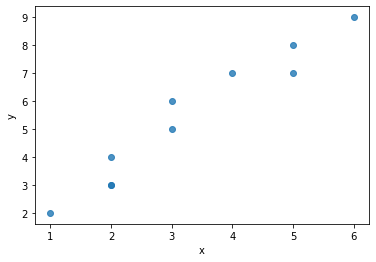

In [15]:
sns.regplot('x', 'y', data=df, fit_reg=False);

#### Prediction function: 
$$ y = ax + b $$ 

In [75]:
a = .5 
b = 1
x = 5

y = a*x+b
y

3.5

#### Cost function (MSE):
$$ MSE = 1/n \sum(y-(ax+b))^2 $$

In [241]:
a = .5
b = 1

def mse(a, b):
    err = df['y']-(a*df['x']+b) #
    return err.apply(lambda x: math.pow(x, 2)).mean()

mse(a,b)

9.825

#### Gradiend descent:

a derivative: $$ 1/N ∑−2x(y−(ax+b)) $$ 

b derivative: $$ 1/N ∑−2(y−(ax+b)) $$

In [297]:
ad = -2*5*(7-3.5)
bd = -2*(7-3.5)

ad, bd

(-35.0, -7.0)

In [160]:
a = .5
b = 1

def gradient(a, b, ler_rate):
    pred_y = (a*df['x']+b) 
    a_der = (-2*df['x']*(df['y'] - pred_y)).mean()
    b_der = -2*(df['y'] - pred_y).mean()
    
    return a_der*ler_rate, b_der*ler_rate

a_der, b_der = gradient(a, b, 0.01)[0], gradient(a, b, 0.01)[1]
print(' A derivative: %s.\n B derivative: %s.' %(a_der, b_der))

 A derivative: -0.225.
 B derivative: -0.055.


In [161]:
a - a_der, b - b_der

(0.725, 1.055)

#### Applying gradient descent

a:  1.3904956324518303 b:  0.8195037338441165


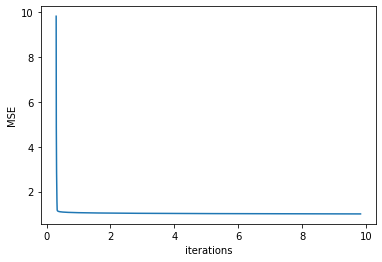

In [294]:
a = .5
b = 1
mse_chart = []
a_values = []
b_values = []

while mse(a,b) > 0.3:
    mse_chart.append(mse(a,b))
    a_values.append(a)
    b_values.append(b)
    grd = gradient(a, b, 0.01)
    a -= grd[0]
    b -= grd[1]    

n = np.linspace(1, max(mse_chart), len(mse_chart))
ax = sns.lineplot(x=mse_chart, y=n);
ax.set(xlabel='iterations', ylabel='MSE'); print('a: ', a, 'b: ',b)

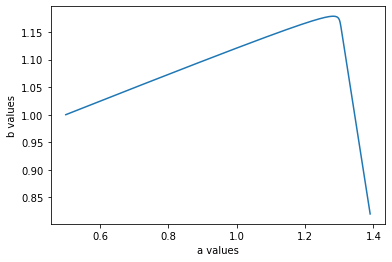

In [296]:
ax = sns.lineplot(x=a_values, y=b_values);
ax.set(xlabel='a values', ylabel='b values');

#### Predicting Y given the trained model.


In [257]:
x = 3.5
y = a*x+b  
y

5.521354791416053

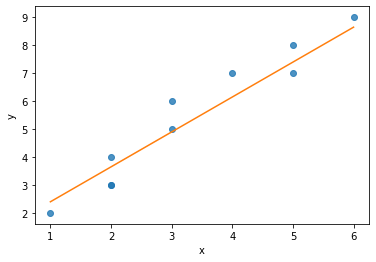

In [263]:
y_pred = df['x'].apply(lambda x: a*x+b)
sns.regplot(df['x'], df['y'], fit_reg=False);
ax = sns.lineplot(x=df['x'], y=y_pred);
ax.set(xlabel='x', ylabel='y');

#### Comparing our model with sklear linear regression.

In [295]:
x = df['x'].ravel().reshape(-1,1)
y = df['y'].ravel().reshape(-1,1)

linreg = LinearRegression().fit(x,y)
linreg.coef_, linreg.intercept_
# linreg.score(x, y)

(array([[1.40248963]]), array([0.77178423]))

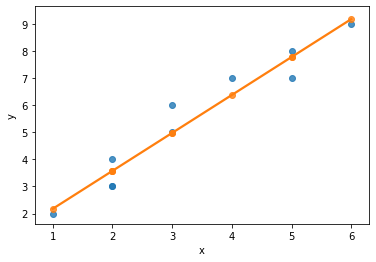

In [293]:
mean_squared_error(y, linreg.predict(x))

0.29958506224066384

#### sklearn MSE:      0.29
#### our model MSE: 0.3